<a href="https://colab.research.google.com/github/mimashraful38/Python-Data-Science-And-Machine-Learning-Projects/blob/main/chronic_Kidney_disease_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task to predict whether person has ckd or notckd??

## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Load Data

In [2]:
data=pd.read_csv('/content/kidney_disease.csv')
columns=pd.read_csv('/content/data_description.txt',sep='-')
print(data.head())
print(columns.head())

   id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0   0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1   1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2   2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3   3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4   4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd

[5 rows x 26 columns]
          1. Features:
id                  id
age                age
bp      blood pressure
sg    specific gravity
al             albumin


In [3]:
data.columns=columns['1. Features:'].values
data.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

Here 'red blood cell count, packed cell volume and white blood cell count' are object type. We need to change to numerical dtype.

In [5]:
col_con=['packed cell volume','white blood cell count','red blood cell count']

In [6]:
def convert_col(data,col_con):
  data[col_con]=pd.to_numeric(data[col_con],errors='coerce')

In [7]:
for i in col_con:
  convert_col(data,i)

In [8]:
data.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

### Extract Numerical & Categorical Features

In [9]:
def cat_num_col(data):
  cat_col=[col for col in data.columns if data[col].dtypes=='object']
  num_col=[col for col in data.columns if data[col].dtypes!='object']
  return cat_col, num_col

In [10]:
cat_col,num_col=cat_num_col(data)

In [11]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [12]:
num_col

['id',
 'age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

### unique categories in our categorical

In [13]:
for col in cat_col:
  print('{} has {}'.format(col,data[col].unique()))

red blood cells has [nan 'normal' 'abnormal']
 pus cell has ['normal' 'abnormal' nan]
pus cell clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
ypertension has ['yes' 'no' nan]
diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary artery disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
pedal edema has ['no' 'yes' nan]
anemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [14]:
#Replace incorrect values
data['diabetes mellitus'].replace(to_replace={' yes':'yes','\tno':'no', '\tyes':'yes'},inplace=True)
data['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)
data['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [15]:
for col in cat_col:
  print('{} has {}'.format(col,data[col].unique()))

red blood cells has [nan 'normal' 'abnormal']
 pus cell has ['normal' 'abnormal' nan]
pus cell clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
ypertension has ['yes' 'no' nan]
diabetes mellitus has ['yes' 'no' nan]
coronary artery disease has ['no' 'yes' nan]
appetite has ['good' 'poor' nan]
pedal edema has ['no' 'yes' nan]
anemia has ['no' 'yes' nan]
class has ['ckd' 'notckd']


### check missing values

In [16]:
for col in cat_col:
  print('{} has null values {}'.format(col,data[col].isnull().sum()))

red blood cells has null values 152
 pus cell has null values 65
pus cell clumps has null values 4
bacteria has null values 4
ypertension has null values 2
diabetes mellitus has null values 2
coronary artery disease has null values 2
appetite has null values 1
pedal edema has null values 1
anemia has null values 1
class has null values 0


In [17]:
for col in num_col:
  print('{} has null values {}'.format(col,data[col].isnull().sum()))

id has null values 0
age has null values 9
blood pressure has null values 12
specific gravity has null values 47
albumin has null values 46
sugar has null values 49
blood glucose random has null values 44
blood urea has null values 19
serum creatinine has null values 17
sodium has null values 87
potassium has null values 88
haemoglobin has null values 52
packed cell volume has null values 71
white blood cell count has null values 106
red blood cell count has null values 131


In [18]:
def dropna_value(cat_col):
  mode=data[cat_col].mode()[0]
  data[cat_col]=data[cat_col].fillna(mode)

In [19]:
for col in cat_col:
  dropna_value(col)

In [20]:
for col in cat_col:
  print('{} has null values {}'.format(col,data[col].isnull().sum()))

red blood cells has null values 0
 pus cell has null values 0
pus cell clumps has null values 0
bacteria has null values 0
ypertension has null values 0
diabetes mellitus has null values 0
coronary artery disease has null values 0
appetite has null values 0
pedal edema has null values 0
anemia has null values 0
class has null values 0


In [21]:
for col in num_col:
  dropna_value(col)

In [22]:
for col in num_col:
  print('{} has null values {}'.format(col,data[col].isnull().sum()))

id has null values 0
age has null values 0
blood pressure has null values 0
specific gravity has null values 0
albumin has null values 0
sugar has null values 0
blood glucose random has null values 0
blood urea has null values 0
serum creatinine has null values 0
sodium has null values 0
potassium has null values 0
haemoglobin has null values 0
packed cell volume has null values 0
white blood cell count has null values 0
red blood cell count has null values 0


###  Checking features distribution

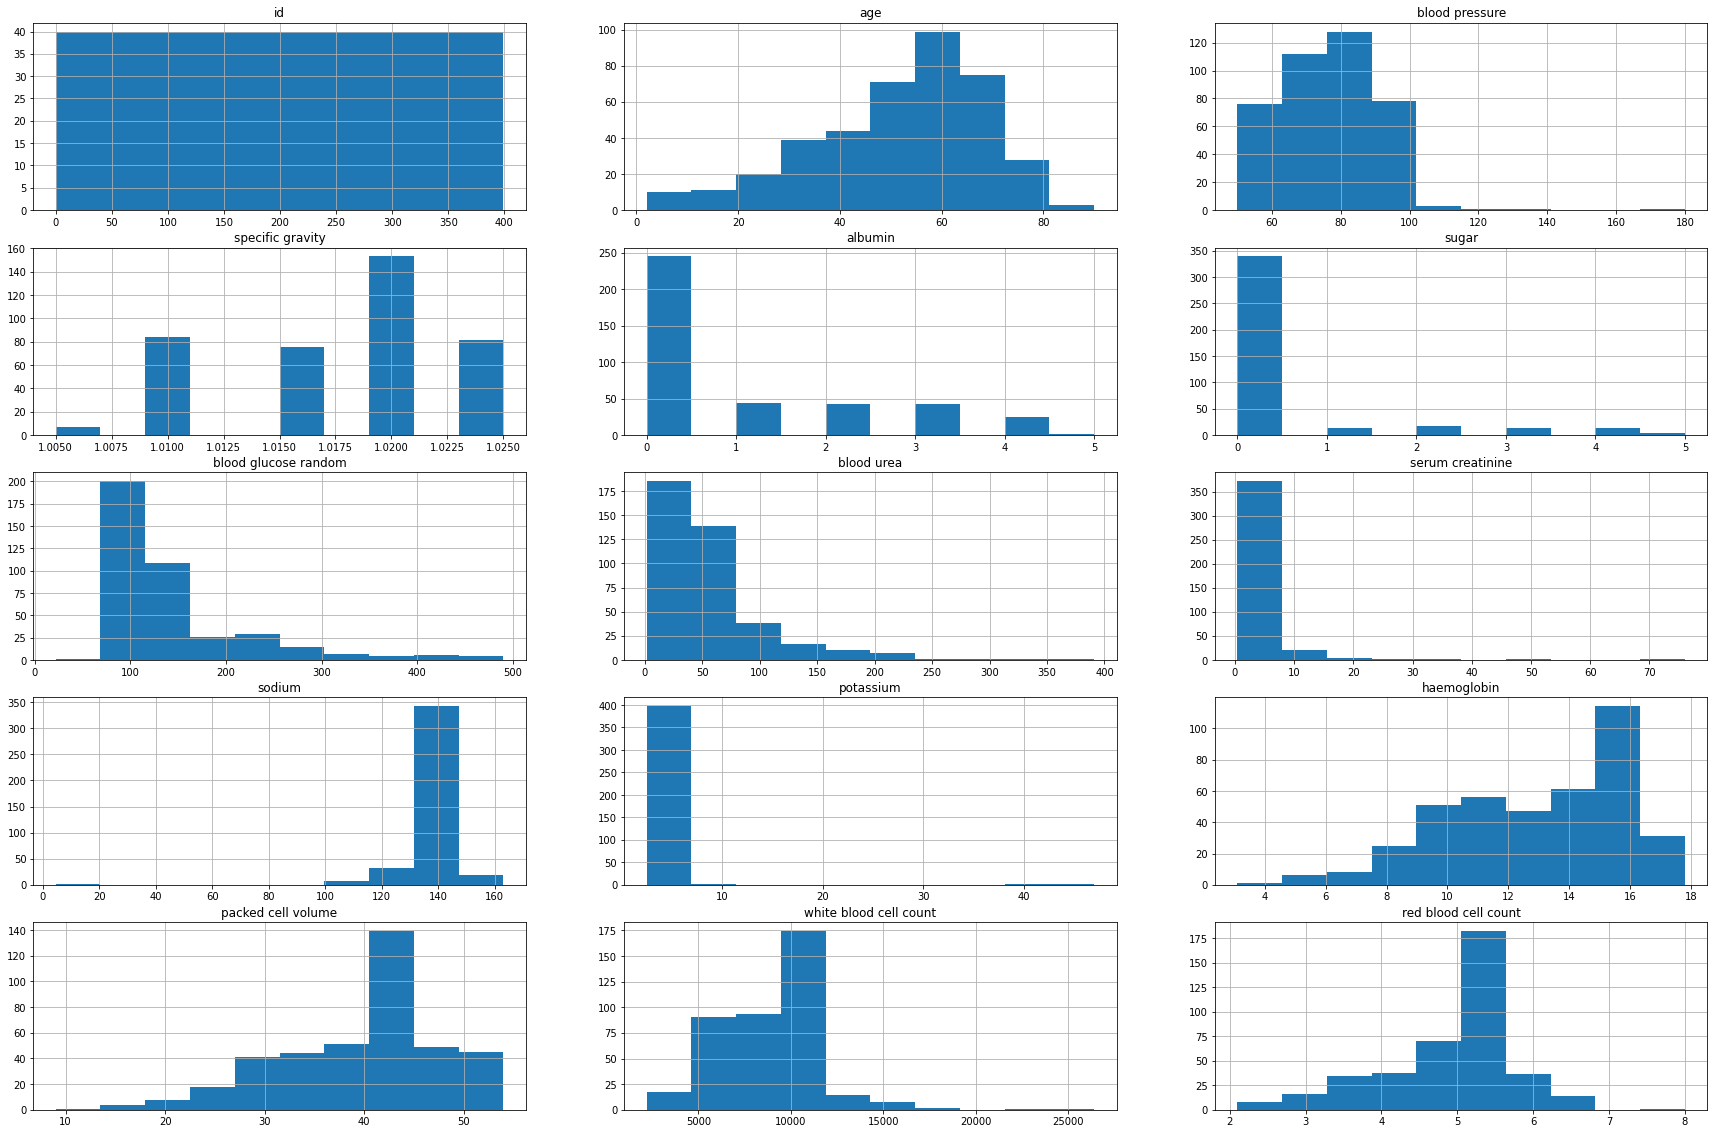

In [23]:
plt.figure(figsize=(30,20))
for i, feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

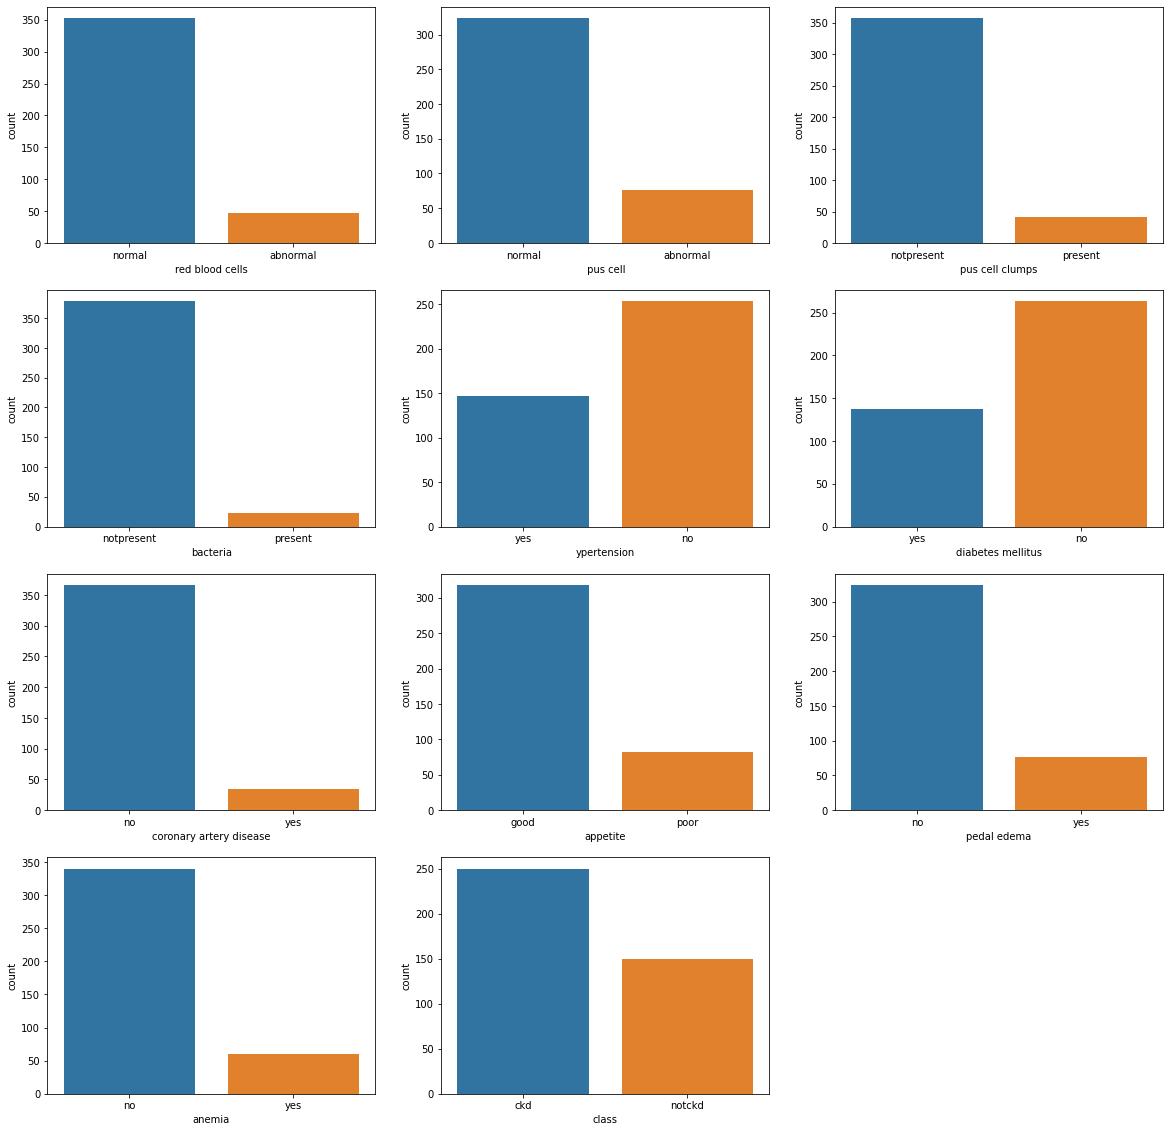

In [24]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(data[feature])

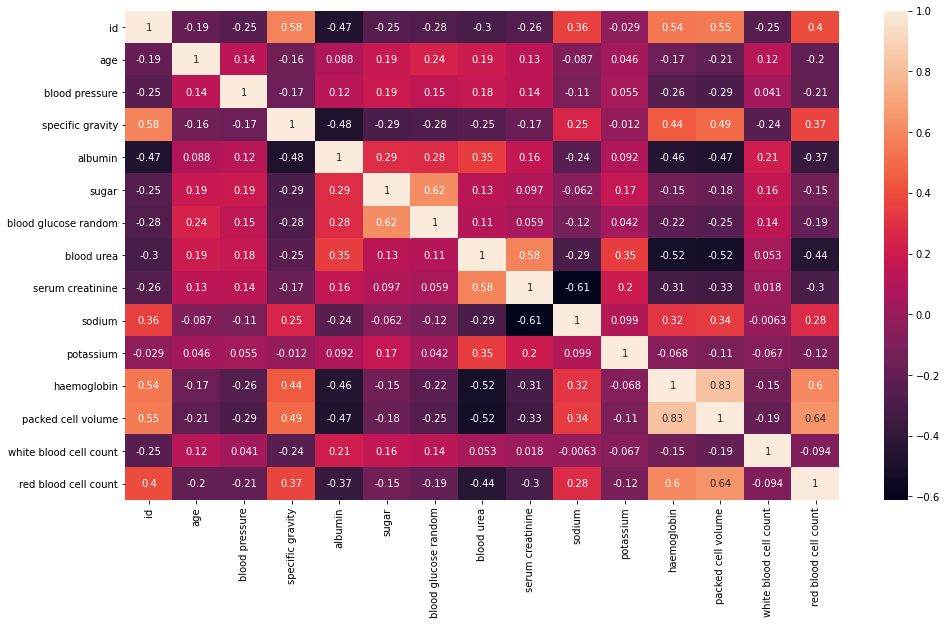

In [25]:
plt.figure(figsize=(16,9))
corr_data=data.corr()
sns.heatmap(corr_data,annot=True)

### feature Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [28]:
data.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,135.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,0.8,135.0,3.5,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,3.5,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [29]:
data.drop(['id'],axis=1,inplace=True)

In [30]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,135.0,3.5,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,18.0,0.8,135.0,3.5,11.3,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,3.5,9.6,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,3.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [31]:
X=data.drop(['class'],axis=1)
y=data['class']

In [33]:
X.shape

(400, 24)

In [34]:
y.shape

(400,)

### Model Building

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(300, 24)
(100, 24)
(300,)
(100,)


In [40]:
rc=RandomForestClassifier()

In [41]:
rc.fit(X_train,y_train)
rc.score(X_test,y_test)

1.0

In [42]:
from sklearn.metrics import accuracy_score

In [45]:
y_pre=rc.predict(X_test)
accuracy_score(y_test,y_pre)

1.0

In [46]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
dc.score(X_test,y_test)

0.98

In [48]:
y_pre_dc=dc.predict(X_test)
accuracy_score(y_test,y_pre_dc)

0.98